Implementing a simple linear regression model 
where the input data is a single feature.

You can implement this for any dataset by making
changes in the cell below the imports


In [ ]:
import numpy as np 
import pandas as pd
import csv
from scipy.stats import t,f 
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [43]:
#Change RAW DATA here and set the input/output variables accordingly
dataset_path = 'C:/ML Playground/datasets/Advertising.csv'
df = pd.read_csv(dataset_path, index_col=0)

In [7]:
predictor = 'TV'
response = 'sales'

X = df[predictor].values   # (predictor/input variable)
y = df[response].values  # (response/output variable)

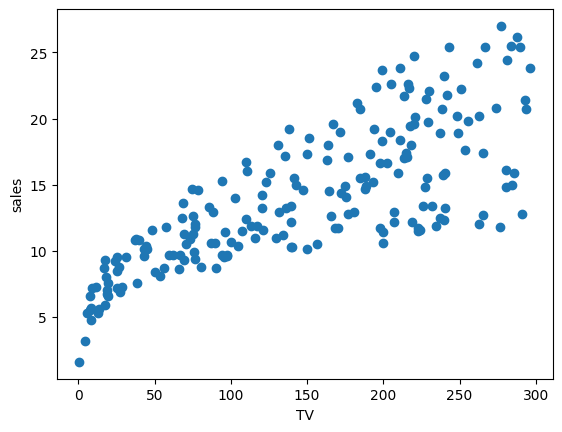

In [8]:
plt.scatter(X, y)   
plt.xlabel(predictor)
plt.ylabel(response)
plt.show()

The coefficients for predicting are being calculated using the following formulaes which are derived from minimizing the RSS (Residual Sum of Squares). If interested in the math i have uploaded my shitty notes because i am too tired to convert it into latex.

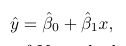



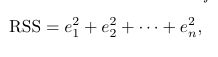

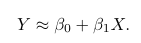

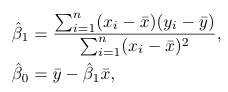

In [9]:
#Basic Calculations
X_mean = np.mean(X)
y_mean = np.mean(y)

#Since beta_0 is dependant on beta_1 , we calculate it first

beta_1 = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
beta_0 = y_mean - beta_1 * X_mean


"""
What do these beta values mean?

beta_1 tells how much the response variable (y) is expected to increase 
when the predictor variable (X) increases by 1 unit.

beta_0 tells the expected value of the response variable (y) 
when the predictor variable (X) is 0.

While these values were computed using the least squares method,
it is important to note that they are estimates of the true population parameters , 
and might not yield the best predictions for all cases.
"""

'\nWhat do these beta values mean?\n\nbeta_1 tells how much the response variable (y) is expected to increase \nwhen the predictor variable (X) increases by 1 unit.\n\nbeta_0 tells the expected value of the response variable (y) \nwhen the predictor variable (X) is 0.\n\nWhile these values were computed using the least squares method,\nit is important to note that they are estimates of the true population parameters , \nand might not yield the best predictions for all cases.\n'

In [10]:
"""
Using these values, we predict the response variable for each value of the predictor variable.
"""

y_pred = beta_0 + beta_1 * X
y_pred

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [11]:
"""
Now that the values have been predicted, we can calculate the residuals and compute the RSS
"""

RSS = np.sum((y - y_pred) ** 2)
RSS

"""
RSS is just the raw measure of total prediction error , and does not provide a good measure of model performance.
Lower RSS = better fit , and can be used to compare models with different predictors.

To get a better measure of model performance, we can calculate RSE (Residual Standard Error).
RSE is the average error per data point , adjusted for the model complexity.

RSE = sqrt(RSS / (n - p - 1)) where where n is the number of observations and p is the number of parameters 
"""

'\nRSS is just the raw measure of total prediction error , and does not provide a good measure of model performance.\nLower RSS = better fit , and can be used to compare models with different predictors.\n\nTo get a better measure of model performance, we can calculate RSE (Residual Standard Error).\nRSE is the average error per data point , adjusted for the model complexity.\n\nRSE = sqrt(RSS / (n - p - 1)) where where n is the number of observations and p is the number of parameters \n'

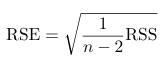

In [12]:
RSE = np.sqrt(RSS / (len(y) - 2))
RSE

"""
Essentially tells me the predicted values are off by +/- 3.26 units on average.

To be noted - units of the dependent variable , in this case sales.

Significance of RSE - If the RSE is high, it means that the model does not fit the data well.
This has to be compared witht the response variable to tell if RSE is large or small.

Ex lets say sales are in the range of 10-100, then RSE of 3.26 is not bad but if sales are 
in the range of 10-20, then RSE of 3.26 is bad.
"""

'\nEssentially tells me the predicted values are off by +/- 3.26 units on average.\n\nTo be noted - units of the dependent variable , in this case sales.\n\nSignificance of RSE - If the RSE is high, it means that the model does not fit the data well.\nThis has to be compared witht the response variable to tell if RSE is large or small.\n\nEx lets say sales are in the range of 10-100, then RSE of 3.26 is not bad but if sales are \nin the range of 10-20, then RSE of 3.26 is bad.\n'

In [13]:
"""
We have assessed our model based on the coefficients we calculated by minimising the RSS.


The coefficients have been calculated based on the sample data , it is important to
gauge how these coefficients would perform if we were to take different smaples from 
the population.

Standard Errors are computed for beta_0 and beta_1
"""



'\nWe have assessed our model based on the coefficients we calculated by minimising the RSS.\n\n\nThe coefficients have been calculated based on the sample data , it is important to\ngauge how these coefficients would perform if we were to take different smaples from \nthe population.\n\nStandard Errors are computed for beta_0 and beta_1\n'

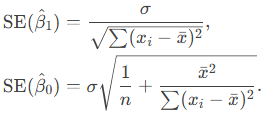

In [14]:
"""
Sigma = RSE computed above
"""




# Sum of squared deviations of x from its mean
SST_X = np.sum((X - X_mean) ** 2)

SE_beta_1 = RSE / np.sqrt(SST_X)
SE_beta_0 = RSE * np.sqrt(1 / len(X) + X_mean ** 2 / SST_X)


In [15]:
SE_beta_1 , SE_beta_0

(np.float64(0.0026906071877968703), np.float64(0.45784294027347855))

In [16]:
beta_0 , beta_1

(np.float64(7.0325935491276965), np.float64(0.047536640433019736))

In [ ]:
"""
We have computed the SE and beta values , now we can compute the t-statistic for each coefficient

If |t| > 2 , then the coefficient is statistically significant.
If |t| < 2 , then the coefficient is not statistically significant.

Standard Errors can thus be used to perform hypothesis testing.

Most common is the null hypothesis which states there is no relationship 
between the predictor (X) and response variable (Y)

H0 : beta_1 = 0 (Since beta_1 is the coefficient of the predictor variable 
    and if beta_1 = 0 the equation reduces to y = beta_0 which means the 
    predictor variable has no effect on the response variable)

The opposite of the null hypothesis is the alternative hypothesis.
Ha : beta_1 != 0
"""



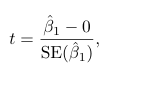


The 0 here corresponds to the hypothesiszed value of our null hyopthesis of beta

In [17]:
t_beta_1 = beta_1 / SE_beta_1
t_beta_0 = beta_0 / SE_beta_0

t_beta_1 , t_beta_0


"""
The null hypothesis can be rejected since t_beta_1 >>>> 2 , 
which means that the predictor variable has an effect on the response variable.
"""

'\nThe null hypothesis can be rejected since t_beta_1 >>>> 2 , \nwhich means that the predictor variable has an effect on the response variable.\n'

In [ ]:
# """
# Since the null hypothesis has been rejected, we can calculate the p-value for beta_1
# """

# p_value_beta_1 = 2 * (1 - t.cdf(t_beta_1, len(X) - 2))
# p_value_beta_0 = 2 * (1 - t.cdf(t_beta_0, len(X) - 2))

In [18]:
"""
Since the null hypothesis has been rejected , we continue with assesting
the accurace of the model.

Quality of a linear regression model is assesed using two related quantities.

RSE - Residual Standard Error
R_Squared - 


RSE while calculated above from the RSS , is an estimate of the standard deviation of the error term.

Remeber there is an error term in the model , which is the difference
 between the true response and the predicted response.

Even if we knew the true regression line, any prediction would stil be off by about RSE units on average.
"""

'\nSince the null hypothesis has been rejected , we continue with assesting\nthe accurace of the model.\n\nQuality of a linear regression model is assesed using two related quantities.\n\nRSE - Residual Standard Error\nR_Squared - \n\n\nRSE while calculated above from the RSS , is an estimate of the standard deviation of the error term.\n\nRemeber there is an error term in the model , which is the difference\n between the true response and the predicted response.\n\nEven if we knew the true regression line, any prediction would stil be off by about RSE units on average.\n'

In [19]:
RSE , y_mean

"""
RSE computed above is 3.26 , and the mean of the response variable is 14.02.

So the percentage error is 3.26 / 14.02 = 23.2%

While the RSE provides an absolute measure of lack of fit of the model, to the data
but it is measured in the units of the response variable. 

It is not always clear what constitutes a good RSE.

R_Squared is an alternative measure of fit.
It is the proportion of variance explained , and is a value between 0 and 1.

R_Squared = 1 - (RSS / TSS)

RSS = Residual Sum of Squares
    The amount of variability left unexplained after performing the regression.
TSS = Total Sum of Squares 
    Total variance in the response Y , the amount of variability inherent in the response
    before the regression is performed

Hence TSS - RSS = amount of variability explained by the model
R_Squared measures the proportion of variability in Y that can be explained using X.

Closer the value to 1 , indicates that a large proportion of the variability 
in the response has been explained by the regression.
"""




'\nRSE computed above is 3.26 , and the mean of the response variable is 14.02.\n\nSo the percentage error is 3.26 / 14.02 = 23.2%\n\nWhile the RSE provides an absolute measure of lack of fit of the model, to the data\nbut it is measured in the units of the response variable. \n\nIt is not always clear what constitutes a good RSE.\n\nR_Squared is an alternative measure of fit.\nIt is the proportion of variance explained , and is a value between 0 and 1.\n\nR_Squared = 1 - (RSS / TSS)\n\nRSS = Residual Sum of Squares\n    The amount of variability left unexplained after performing the regression.\nTSS = Total Sum of Squares \n    Total variance in the response Y , the amount of variability inherent in the response\n    before the regression is performed\n\nHence TSS - RSS = amount of variability explained by the model\nR_Squared measures the proportion of variability in Y that can be explained using X.\n\nCloser the value to 1 , indicates that a large proportion of the variability \nin 

In [20]:
TSS = np.sum((y - y_mean) ** 2)
R_Squared = 1 - (RSS / TSS)
R_Squared

np.float64(0.611875050850071)

MULTIPLE LINEAR REGRESSION


Simple Linear Regeression - Single Predictor Single Respone \
Multiple Linear Regression - Multiple Predictor Single Response

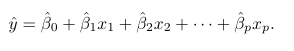

In [21]:
X = []
y = []

with open('C:/ML Playground/datasets/Advertising.csv', 'r') as f: 
    reader = csv.reader(f)
    headers = next(reader)
    for row in reader:
        tv = float(row[1])
        radio = float(row[2])
        newspaper = float(row[3])
        sales = float(row[4])
        X.append([1.0, tv, radio, newspaper])
        y.append([sales])

In [22]:
raw_data = pd.read_csv('C:/ML Playground/datasets/Advertising.csv', index_col=0)
correlation_matrix = raw_data.corr()
correlation_matrix

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

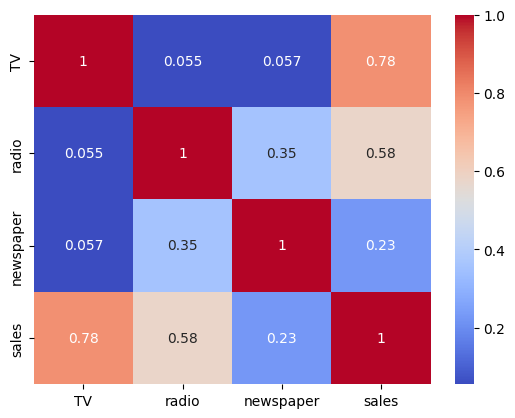

In [23]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


Correaltion :

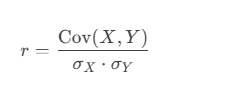

Covariance (X,Y) : 

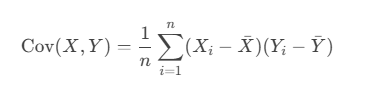


Standard Deviation :

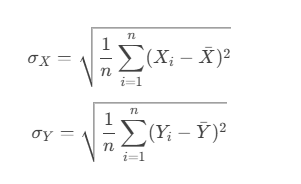

In [24]:
def transpose(matrix : list[list[float]]) -> list[list[float]]:
    ROWS, COLS = len(matrix), len(matrix[0])

    transposed_result = [[0] * ROWS for x in range(COLS)]

    for r in range(ROWS):
        for c in range(COLS):
            transposed_result[c][r] = matrix[r][c]
    
    return transposed_result

def matrix_multiply(matrix1, matrix2):
    rows_matrix1, cols_matrix1 = len(matrix1), len(matrix1[0])
    rows_matrix2, cols_matrix2 = len(matrix2), len(matrix2[0])
    
    if cols_matrix1 != rows_matrix2:
        raise ValueError("Matrices dimensions are incompatible for multiplication.")
    
    result = [[0.0 for _ in range(cols_matrix2)] for _ in range(rows_matrix1)]
    for i in range(rows_matrix1):
        for k in range(cols_matrix1):
            if matrix1[i][k] == 0:
                continue 
            for j in range(cols_matrix2):
                result[i][j] += matrix1[i][k] * matrix2[k][j]
    return result

def matrix_inverse(matrix):
    n = len(matrix)
    augmented = [row + [1.0 if i == j else 0.0 for j in range(n)] for i, row in enumerate(matrix)]
    
    for col in range(n):
        pivot = col
        for row in range(col, n):
            if abs(augmented[row][col]) > abs(augmented[pivot][col]):
                pivot = row
        augmented[col], augmented[pivot] = augmented[pivot], augmented[col]
        pivot_val = augmented[col][col]
        for j in range(col, 2*n):
            augmented[col][j] /= pivot_val
        for i in range(n):
            if i != col:
                factor = augmented[i][col]
                for j in range(col, 2*n):
                    augmented[i][j] -= factor * augmented[col][j]
    
    inverse = [row[n:] for row in augmented]
    return inverse


X_T = transpose(X)
X_T_X = matrix_multiply(X_T, X)
try:
    X_T_X_inv = matrix_inverse(X_T_X)
except ValueError as e:
    print("Error: Matrix is singular. Check for multicollinearity.")
    raise e

X_T_y = matrix_multiply(X_T, y)
coefficients = matrix_multiply(X_T_X_inv, X_T_y)

# Flatten coefficients for output
coefficients = [coeff[0] for coeff in coefficients]
print(f"Intercept (b0): {coefficients[0]:.4f}")
print(f"TV coefficient (b1): {coefficients[1]:.4f}")
print(f"Radio coefficient (b2): {coefficients[2]:.4f}")
print(f"Newspaper coefficient (b3): {coefficients[3]:.4f}")

Intercept (b0): 2.9389
TV coefficient (b1): 0.0458
Radio coefficient (b2): 0.1885
Newspaper coefficient (b3): -0.0010


Or you can just use the numpy library - numpy.linalg.lstq which gets you the coefficients without computing the inverse of X_T_X

In [25]:
coefficients = np.linalg.lstsq(X, y, rcond=None)[0]
coefficients = [x for x in coefficients]
coefficients = [float(coeff[0]) for coeff in coefficients]

print(f"Intercept (b0): {coefficients[0]:.4f}")
print(f"TV coefficient (b1): {coefficients[1]:.4f}")
print(f"Radio coefficient (b2): {coefficients[2]:.4f}")
print(f"Newspaper coefficient (b3): {coefficients[3]:.4f}")

Intercept (b0): 2.9389
TV coefficient (b1): 0.0458
Radio coefficient (b2): 0.1885
Newspaper coefficient (b3): -0.0010


In [26]:
y_pred_multi = coefficients[0] + coefficients[1] * np.array(pd.DataFrame(X)[1].to_list()) + coefficients[2] * np.array(pd.DataFrame(X)[2].to_list()) + coefficients[3] * np.array(pd.DataFrame(X)[3].to_list())

In [27]:
# flatten y to np array
y = np.array(y)
y = y.flatten()
y
# y = np.array(pd.DataFrame(4).to_list())


array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [28]:
RSS = sum((y - y_pred_multi) ** 2)
RSS

np.float64(556.825262902187)

In [29]:
RSE = np.sqrt(RSS / (len(y) - 4))
RSE

np.float64(1.6855103734147439)

In [30]:

variance_covariance_matrix = RSE ** 2 * np.array(X_T_X_inv)
variance_covariance_matrix

array([[ 9.72867479e-02, -2.65727337e-04, -1.11548946e-03,
        -5.91021239e-04],
       [-2.65727337e-04,  1.94573710e-06, -4.47039463e-07,
        -3.26595026e-07],
       [-1.11548946e-03, -4.47039463e-07,  7.41533504e-05,
        -1.78006245e-05],
       [-5.91021239e-04, -3.26595026e-07, -1.78006245e-05,
         3.44687543e-05]])

In [31]:
standard_errors = []
for i in range(len(list(variance_covariance_matrix))):
    standard_errors.append([np.sqrt(variance_covariance_matrix[i][i])])

standard_errors

[[np.float64(0.31190823632179143)],
 [np.float64(0.001394896806974974)],
 [np.float64(0.008611233967301955)],
 [np.float64(0.005871009647086363)]]

In [32]:
t_statistics = []
for i in range(len(standard_errors)):
    t_statistics.append(float(coefficients[i] / standard_errors[i][0]))

t_statistics

[9.422288440076356,
 32.80862442766966,
 21.893496058065423,
 -0.17671458656029146]

In [ ]:
"""
Finally we compute the p values for each coefficient

p_value = 2 * (1 - t.cdf(t_statistic, n - p - 1))
"""


In [33]:
t_statistics

[9.422288440076356,
 32.80862442766966,
 21.893496058065423,
 -0.17671458656029146]

In [34]:
"""
T - Test , test the significance of a single coefficient in a regression model.
"""

p_values = []
for i in t_statistics:
    p_values.append(2 * (1 - t.cdf(abs(i), len(X) - 4 )))

p_values

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.8599150500805635)]

1. Relationship b/w response and predictors - 
    In order to determine whether there is a relationship b/w response and the predictors we ask whether all are predictor coefficients are equal to 0.
    
    Testing the null hypothesis:
        H_zero : beta_1 = beta_2 = beta_3 = beta_p = 0
    
    versus  the alternate hypothesis:
        H_alpha : atleast one beta_j is non-zero

    
    The hypothesis test is performed by computing the F-Statistic

    F-Statistic = ((TSS - RSS) / p) / (RSS / n - p - 1)

    The numerator (TSS - RSS) / p : Represents the variance explained by the predictors. In case of null hypothesis being true there is no relationship hence the value is just random noise and expected value is $\sigma^2$
    <br>
    The denominator (RSS / n - p - 1) : Represents the unexplained variance.It's expected value is also $\sigma^2$
    <br>
    Thus in case of Null Hypothesis being true. The F-Statistic is close to 1.

In [35]:
y_mean_multi = np.mean(y)
TSS = np.sum((y - y_mean_multi) ** 2)
TSS

np.float64(5417.14875)

In [36]:
R_Squared_multi = 1 - (RSS / TSS)
R_Squared_multi

np.float64(0.8972106381789522)

In [37]:
F_statistic = (TSS - RSS) / 3 / (RSS / (len(y) - 3 - 1))
F_statistic

np.float64(570.2707036590945)

Our F-Statistic is >>> 1 , suggesting atleast one of the predictors must be related to the response.

Also a question can be asked how large the F-Statistic has to be to reject Null Hypothesis. When n is large an F-Statistic that is a little larger than 1 might provide evidence against the null Hypothesis.

For any given value of n and p , we can compute the p value associated with the F-Statistic using this distribution.Based on this we can determine whether to accept or reject null hypthesis

In [41]:
"""
F- Test , test whether atleast one predictor variable is significantly related to the response variable.
"""

p_value = 1 - f.cdf(F_statistic, 3, len(y) - 3 - 1)
p_value

np.float64(1.1102230246251565e-16)

The p value is extremely small , so we have strong evidence that atleast one of the predictors is associated with the response variable.


We also computed a t-statistic and p-value for each preidctors. These provide information about whether each individual predictor is related to the response after adjusting for the other predictors.
<br>
Interestingly if a second model is fit without the predictor in question then the F-Statistic computed for the second model is equal to the t-statistic squared for that predictor that was omitted in the reduced model.

<br>

For our third predictor the t-statistic <<< 2 and p-value is > 0.05 , suggesting no evidence the predictor is related to the response. So why the need to compute an overall F-Statistic?

Since if any one of the p-values for the predictors is very small, then atleast one of the predictors is related to the response? Well you can be right by luck but no this logic is flawed , especially when the number of predictos is very large.
<br>
Consider p = 100 and the null hypothesis is true , no predictor is truly asssociated with the response.A significance level $\alpha$ is decided to determine whether a p-value is small enough. A common choice being 0.05 , which means we are willing to accept a 5% chance of incorrectly rejecting the null hypothesis.
<br>
Since the p values follow a uniform distribution b/w 0 and 1 any p value is equally likely. So if we perform p = 100 tests , the probability that any test yields a value less than $\alpha$ is exactly equal to $\alpha$.
<br>

Therefor if null hypothesis is true for all tests for p = 100 we expect about 5% of the values to be < $\alpha$ (0.05). These are referred to as false positives or Type 1 errors.
<br>

The F-Statistic does not suffer from this problem because it adjusts for the number of predictors. If null hypothesis is true there is only a 5% chance that the F-Statistic will result in a p - value less than 0.05, regardless of the number of observations.
<br>
Though if the number of predictors is extremely large p > n then there are more coefficients to estimate than observations in that case the multiple linear regression model using least squares cannot be fit.



2. Deciding on Important Variables - Once we have determine atleast one of the predictors are  related to the response , the next questions arises which are the ones that are not.While the easy solution is to look at the individual  predictor p values computed from the t-statistic. If p is large as discussed above we could make false selections.

By trying out a lot of models containing a different subset of predictors , we can perform variable selection and decide which predictors are the  best.

Ex - For p = 2 a total of $2^p$ models are possible - [No variables,1st Prdictor Only,2nd Predictor Only,Both Predictors]

For Higher values trying out evrey subset is impossible. Leading to a need for an automated / efficient approach. There are three classical approaches :


    1. Forward Approach - Begin with a null model (model with just the intercept beta_0) but no predictors. Then fit p simple linear regressions and add to the null model the variable that results in the lowest RSS. Kepp adding till a threshold / stopping rule is satisfied.

    2. Backward Selection - Start with the all the variables in the model and remove the variable with the largest p-value. The new model is fit and then Continute till a threshold / stopping rule is satisfied.

    3. Mixed Selection - Combination of above. We start with a null model and add , the p-values for variables can become larger as new predictors are added. Hence if the p values rise above a certain threshold then we remove that variable. This is continued until all variables in the model have sufficiently low p-value.

Backward selection cannot be used if p > n and forward selection can always be used , but is a greedy approach as it might include variables that later become redundant. Mixed Selection Solves this.

3. Model Fit - Previously we have calculated RSE and R_Squared to assess the model fit. Remember a R_Squared values close to 1 indicates a good fit. What happens to R_Squared 
when we add more predictors to the model? Well , R_Squared will always increase when a predictor is added to the model. This is because the model is fitting the data better and in 
mathematical terms , the RSS will always decrease when a predictor is added. The small increase in R_Squared isn further evidence that the predictor can be dropped from the model as its
inclusion will only lead to overfitting and poor test results on independent data. Meanwhile adding a predictor which is more significant towards predicting the response will lead to a much 
more increase in the R_Squared calculations.
<br>
<br>
In case of RSE , it is mathematically possible for the RSE to increase when a predictor is added to the model. This is because if the decrease in RSS is mall relative to the increase in 
the value of p

4. Predictors - 
    1. The coefficient estimates for beta_0 , beta_1 , beta_2 , beta_p (least squares plane) are only estimates for the true population regression plane. The inaccuracy is related to the reducible error.
    2. Chosing a linear model is always an approximation , an additional source of potentially reducible error which is called model bias. Thus when chosing a linear model , we are in fact estimating the best linear estimation.
    3. Even if we knew the true values for the coefficients , the response cannot be predicted perfectley because of the randome error $\epsilon$ also referred to as the irreducible error.



Extensions of the Linear Model

Two of the most important assumptions state that the relationship between the predictors and response are additive and linear.

1. The additivity assumption additive means that the association between a predictor $X_j$ and the response Y does not depend on the values of the other predictors. 

2. The linearity assumption states that the change in the response Y associated with a one-unit change in $X_j$ is constant, regardless of the value of $X_j$.


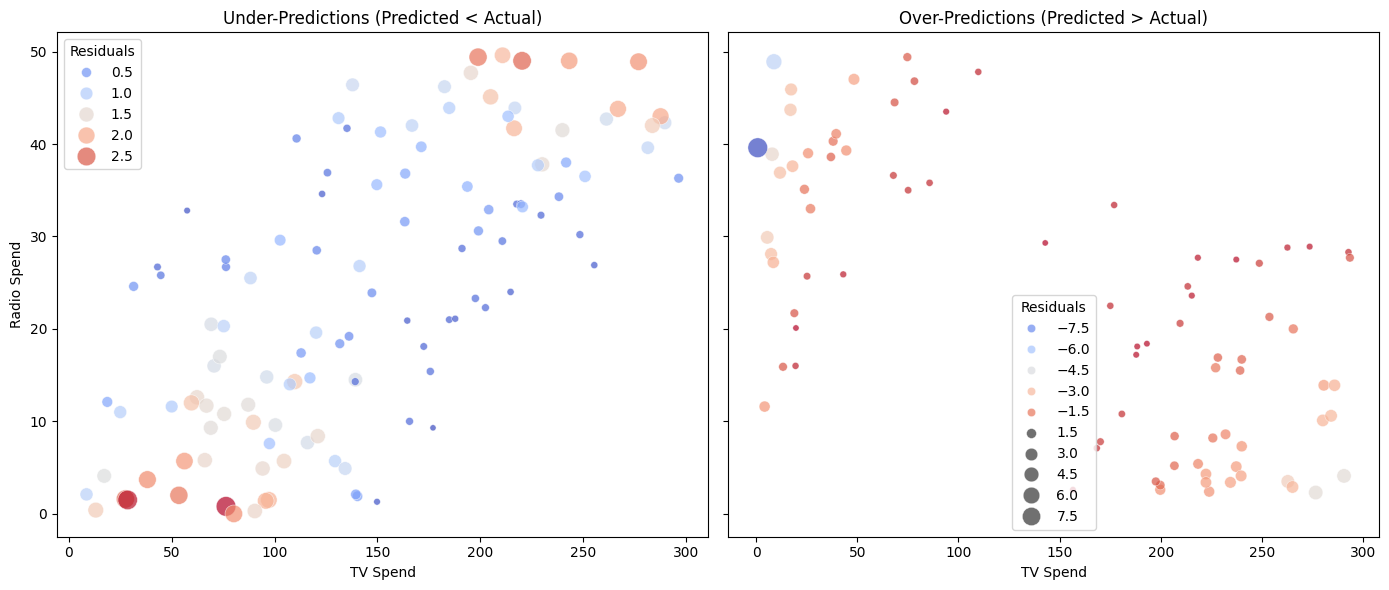

In [42]:
y_pred_only_2_predictors = coefficients[0] + coefficients[1] * np.array(pd.DataFrame(X)[1].to_list()) + coefficients[2] * np.array(pd.DataFrame(X)[2].to_list())

TV = df['TV'].values
Radio = df['radio'].values
Actual_Sales = df['sales'].values
Predicted_Sales = y_pred_only_2_predictors

df['Residuals'] = Actual_Sales - Predicted_Sales


under_predicted = df[df['Residuals'] > 0]
over_predicted = df[df['Residuals'] < 0]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)


sns.scatterplot(ax=axes[0], x=under_predicted['TV'], y=under_predicted['radio'],
                hue=under_predicted['Residuals'], palette="coolwarm", size=abs(under_predicted['Residuals']),
                sizes=(20, 200), alpha=0.7)
axes[0].set_title("Under-Predictions (Predicted < Actual)")
axes[0].set_xlabel("TV Spend")
axes[0].set_ylabel("Radio Spend")


sns.scatterplot(ax=axes[1], x=over_predicted['TV'], y=over_predicted['radio'],
                hue=over_predicted['Residuals'], palette="coolwarm", size=abs(over_predicted['Residuals']),
                sizes=(20, 200), alpha=0.7)
axes[1].set_title("Over-Predictions (Predicted > Actual)")
axes[1].set_xlabel("TV Spend")
axes[1].set_ylabel("Radio Spend")

plt.tight_layout()
plt.show()

ADDITIVE ASSUMPTION

<br>

For the additive assumption -
Ex - In the multi preidctor model we trained in this notebook we found out predictor 1 and 2 are both associated with the response. The linear model states that the average increase in the response associated with an increase in predictor 1 is always $beta_1$ and independant of the other predictor.In the dataset shared above tv and radio are the two predictors and sales is the response.For a budget of total X , allocating X/2 to radio and X/2 to TV may lead to an increase in sales compared to putting it all in radio and TV.

This is referred to as <b>interaction effect</b>.

The true sales are lower when either of the values for radio and tv are low. But when the budget is split b/w radio and tv the model understimates the sales.

This model is represented by :

\[
\begin{aligned}
Y = B_0 + B_1 X_1 + B_2 X_2 + \epsilon
\end{aligned}
\]

A unit increase in $X_1$ is associated with an average increase in $Y$ by roughly $B_1$ units. Regardless the values of $X_2$ , this change is unaffacted.

To accomodate this , an <i>interaction term</i> can be introduced , which is computed by the product of $X_1$ and $X_2$.
Resulting in a new model represented by :

\[
\begin{aligned}
Y = B_0 + B_1 X_1 + B_2 X_2 + B_3 X_1 X_2 \epsilon
\end{aligned}
\]

How does this relax the additive assumption , well the new model can be refactored as  :

$$
\mathbf{Y} = \beta_0 + (\beta_1 + \beta_3 X_2) X_1 + \beta_2 X_2 + \epsilon
$$

$$
= \beta_0 + \tilde{\beta}_1 X_1 + \beta_2 X_2 + \epsilon
$$


$\tilde{\beta}_1$ is now a function of $X_2$ the association between $Y$ and $X_1$ is no longer constant. Similar refactoring can prove the interaction term proves the constant association b/w $Y$ and $X_2$ is solved.


Let's fit a third model with this interacion term accomodated for.


In [44]:
X = []
y = []

with open(dataset_path, 'r') as f:
    reader = csv.reader(f)
    headers = next(reader)
    for row in reader:
        tv = float(row[1])
        radio = float(row[2])
        newspaper = float(row[3])
        sales = float(row[4])
        X.append([1.0, tv, radio, tv*radio])
        y.append([sales])

In [45]:
X_T = transpose(X)
X_T_X = matrix_multiply(X_T, X)
try:
    X_T_X_inv = matrix_inverse(X_T_X)
except ValueError as e:
    print("Error: Matrix is singular. Check for multicollinearity.")
    raise e

X_T_y = matrix_multiply(X_T, y)
coefficients = matrix_multiply(X_T_X_inv, X_T_y)

# Flatten coefficients for output
coefficients = [coeff[0] for coeff in coefficients]
print(f"Intercept (b0): {coefficients[0]:.4f}")
print(f"TV coefficient (b1): {coefficients[1]:.4f}")
print(f"Radio coefficient (b2): {coefficients[2]:.4f}")
print(f"Interaction Term coefficient (b3): {coefficients[3]:.4f}")

Intercept (b0): 6.7502
TV coefficient (b1): 0.0191
Radio coefficient (b2): 0.0289
Interaction Term coefficient (b3): 0.0011


In [46]:
final_df = pd.DataFrame(X)
final_df['4'] = pd.DataFrame(y)
final_df['predicted_value_only_2'] = coefficients[0] + (coefficients[1] * final_df[1]) + (coefficients[2] * final_df[2])
final_df['predicted_values_interaction_term'] = coefficients[0] + ((coefficients[1] + coefficients[3] * final_df[2]) * final_df[1]) + coefficients[2] * final_df[2]
final_df

,0,1,2,3,4,predicted_value_only_2,predicted_values_interaction_term
0,1.0,230.1,37.8,8697.78,22.1,12.236298,21.686390
1,1.0,44.5,39.3,1748.85,10.4,8.734429,10.634546
2,1.0,17.2,45.9,789.48,9.3,8.403448,9.261214
3,1.0,151.5,41.3,6256.95,18.5,10.835965,17.634108
4,1.0,180.8,10.8,1952.64,12.9,10.515386,12.636919
...,...,...,...,...,...,...,...
195,1.0,38.2,3.7,141.34,7.6,7.586664,7.740230
196,1.0,94.2,4.9,461.58,9.7,8.690957,9.192461
197,1.0,177.0,9.3,1646.10,12.8,10.399511,12.187990
198,1.0,283.6,42.0,11911.20,25.5,13.379419,26.320875


In [47]:
final_df['Residuals'] = (final_df['predicted_values_interaction_term'] - final_df['4']) ** 2
RSS_interaction_term = final_df['Residuals'].sum()
RSS_interaction_term

np.float64(174.48338262772717)

In [48]:
RSS_interaction_term = final_df['Residuals'].sum()
RSS_interaction_term
RSE_interaction_term = np.sqrt(RSS_interaction_term / (len(y) - 3))
RSE_interaction_term

np.float64(0.9411176599591253)

In [49]:

variance_covariance_matrix_interaction_term = RSE_interaction_term ** 2 * np.array(X_T_X_inv)
# variance_covariance_matrix_interaction_term

standard_errors_interaction_term = []
for i in range(len(list(variance_covariance_matrix_interaction_term))):
    standard_errors_interaction_term.append(np.sqrt(variance_covariance_matrix_interaction_term[i][i]))

standard_errors_interaction_term

[np.float64(0.24724145438009748),
 np.float64(0.001500323023432712),
 np.float64(0.008882641891603352),
 np.float64(5.2287179836998736e-05)]

In [50]:
t_statistic_interaction_term = []
for i,j in zip(coefficients,standard_errors_interaction_term):
    t_statistic_interaction_term.append(i/j)

t_statistic_interaction_term

[np.float64(27.302137580447106),
 np.float64(12.731307546917435),
 np.float64(3.249071644687559),
 np.float64(20.779370801352115)]

In [51]:
p_values_interaction_term = []
for i in t_statistic_interaction_term:
    p_values_interaction_term.append(2 * (1 - t.cdf(abs(i), len(X) - 4 )))

p_values_interaction_term

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0013624709198505336),
 np.float64(0.0)]

In [52]:
y_mean_df = final_df['4'].mean()
final_df['mean_residual'] = (final_df['4'] - y_mean_df) ** 2
final_df_TSS = final_df['mean_residual'].sum()
R_Squared_interaction_term = 1 - (RSS_interaction_term / final_df_TSS)
R_Squared_interaction_term

np.float64(0.9677905498482523)

The $R^2$ for the new model is 96.8%  compared to only 89.7% of the previous model. And the $p-value$ for the interaction term is < 0.000001 , thus rejecting the null hypthesis that there is a relation b/w the interaction term and the response.

The $p-value$ values for all the coefficients are statistically significant , however it is possible that the interaction term has a very small $p-value$ but the associated main effects do not. The hierarchical principal states that if we include an interaction in a model , we must include the main effects , even if p-values associated with their coefficients are not significant. $X_1$ and $X_2$ must be included if the the interaction term $X_1$ $X_2$ is being included

NON-LINEAR RELATIONSHIPS

Linear Regression Models by defaul assume a linear relation b/w the response and the predictors. But in the some case the true relation b/w the predictors and the response may be non linear.
Leveraging polynomial regression we can extend our linear model to accomodate non-linear relationships.

A simple way to achieve this is to include transformed version of the predictors.

Assuming a predictor $Y$ and predictor $x$ , and there is a non linear relation b/w the two.

A simple linear regression model would yielf $Y$ = $B_0$ + $B_1$ $X$

this can be modified into 

$Y$ = $B_0$ + $B_1$ $X$ + $B_2$ $X^2$

This is also referred to as Polynomial Regression


Problems when one fits a linear regression model 

1. Non Linearity of Data - Assumption of a straight line relationship b/w the predictors and response. Prediction accuracy can be significantly reduced. Can be identified using residual plots. Plotting residuals $e_i$ versus the fitted value $\hat{Y}_i$ . Ideally the residual plot will show no pattern , the presence of one may indicate a problem with some aspect of the model.
<br>
2. Correlation of Error Terms - An important assuumption of the linear regression model is that the error terms are uncorrelated. $e_i$ being positive provides little to no information about $e_{i+1}$. In case of correlation in error terms , then the standard errors will be understimated and confidence and prediction intervals will be narrower than they should be.

    Ex - if we accidentaly double our data leading to observations and error terms identical in pairs. Our standard errors would be on a sample size of $2n$ , same for the estimated paramters. Such corelations frequently occur in time series data. Observations at adjacent time points could have positively correlated errors. This can be checked by plotting residuals as a function of time. In case of no correlation there should be no discernable pattern. A pattern might emerge in adjacent residuals in case of correlation.
<br>
3. Non-Constant Variance of Error Terms - Error Terms of the linear regression model are assumed to have constand variance, $Var(e_i)$ = $\sigma^2$
    The standard errors, confidence intervals, and hypothesis tests associated with the linear model rely upon this assumption.

    Non-Constant variances in error terms also referred to as heteroscedasticity can be identified from the presence of funnel shape in the residual vs fitted values plot. When faced with this problem one possible solution is to transform $Y$ using a function like log y / sqrt(y)

4. Outliers - Outliers being points for which the actual value is far from the predicted value. Removing Outliers has little effect on the least squares lines. While an outlier does not have much effect on the least squares fit , it can cause other paramters such as RSE and subsequently derived paramters like $R^2$ to change based on inclusion.

    Residual Plots can be used to identify outliers , but to decide how large a residual has to be before we consider it an outlier , we can compute the studentized residuals by dividing each residual $e_1$ by its estimated standard error.

    A quick solution to handling outlier is to simply remove the observation , though it might be possible the outlier may indicate a deficiency with the model such as a missing predictor.

5. Collinearity - Two or more Preidctors are closely related to each other. Reduced the accuracy of the estimates of the coefficients and causes the standard error to increase. Since the t-statistic is inversely proprotional to the standard error. Collinearity results in a decline in the t-statistic. Thus eventually leading to failure in rejecting the null hypothesis.

    A simple way to detect collinearity is to look at the correlation matrix of the predictors. A large value indicates collinearity.

    Also it is possible for collinearity to exist between three or more variables. This is referred to as multicollinearity. A better way to assess multicollinearity is to compute the variance inflation factor (VIF).

    The VIF is variance the ratio of the variance of $\hat{B}_j$ when fitting the full model divided by the variance of $\hat{B}_j$ if fit on its own. Smallest value is 1 indicating complete absense of collinearity.A value of 5 or 10 indicates a problematic amount of collinearity. The VIF for each value can be computed using this formula

    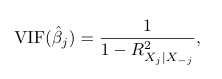 

    where $R^2_{X_j | X_{-j}}$ is the $R^2$ from a regression of $X_j$ onto all the other predictors. If it is close to then collinearity is present and VIF will be large.

    The solution to collinearity has two solutions - 
        1. Drop one of the problematic variables
        2. Combine the collinear variables together into a single predictor